<a href="https://colab.research.google.com/github/khaiprograms/MLRepo/blob/main/Week03_Lab_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 03 INF2008 Lab: Linear Regression Case Study

We import some libaries below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Upload the csv data file into the Google colab file system.

Create a dataframe (dataset) by reading the CSV file: 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

In [50]:
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

View the top 5 and bottom 5 rows.

In [9]:
combined_df = pd.concat([df.head(), df.tail()])
print(combined_df)

         month        town         flat_type block        street_name  \
0      2017-01  ANG MO KIO            2 ROOM   406  ANG MO KIO AVE 10   
1      2017-01  ANG MO KIO            3 ROOM   108   ANG MO KIO AVE 4   
2      2017-01  ANG MO KIO            3 ROOM   602   ANG MO KIO AVE 5   
3      2017-01  ANG MO KIO            3 ROOM   465  ANG MO KIO AVE 10   
4      2017-01  ANG MO KIO            3 ROOM   601   ANG MO KIO AVE 5   
82796  2020-10      YISHUN         EXECUTIVE   834       YISHUN ST 81   
82797  2020-10      YISHUN         EXECUTIVE   877       YISHUN ST 81   
82798  2020-10      YISHUN         EXECUTIVE   877       YISHUN ST 81   
82799  2020-10      YISHUN  MULTI-GENERATION   633       YISHUN ST 61   
82800  2020-10      YISHUN  MULTI-GENERATION   633       YISHUN ST 61   

      storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0         10 TO 12            44.0          Improved                 1979   
1         01 TO 03            67.0    New 

View only the top five rows.

In [10]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


View only the bottom five rows.

In [11]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
82796,2020-10,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,66 years 03 months,680000.0
82797,2020-10,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,145.0,Maisonette,1987,66 years 02 months,618000.0
82798,2020-10,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,66 years 02 months,670000.0
82799,2020-10,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,66 years 02 months,750000.0
82800,2020-10,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,171.0,Multi Generation,1987,66 years 02 months,780000.0


View the columns in the dataframe.

In [12]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Check the data types of the columns (hint, use the dtypes property).

In [14]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

Check if there is any null or missing data in the dataframe.

In [16]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Use the describe function to find out what are some of the basic statistical metrics in the numberical columns of the dataset.

In [17]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,82801.000000,82801.000000,8.280100e+04
mean,97.661664,1994.199345,4.404444e+05
std,24.290822,12.891561,1.537263e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


This describes the dataset for all the columns. It is useful to find number of  unique values for individual columns.

In [18]:
include = ['object', 'float', 'int']
df.describe(include=include)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,82801,82801,82801,82801,82801,82801,82801.000000,82801,82801.000000,82801,8.280100e+04
unique,46,26,7,2457,549,17,NaN,20,NaN,625,NaN
top,2018-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 09 months,NaN
freq,2539,6659,34288,280,1277,19273,NaN,27069,NaN,648,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.661664,NaN,1994.199345,NaN,4.404444e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.290822,NaN,12.891561,NaN,1.537263e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1984.000000,NaN,3.300000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,1994.000000,NaN,4.100000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2003.000000,NaN,5.150000e+05


<ipython-input-19-6f08bf24c7f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


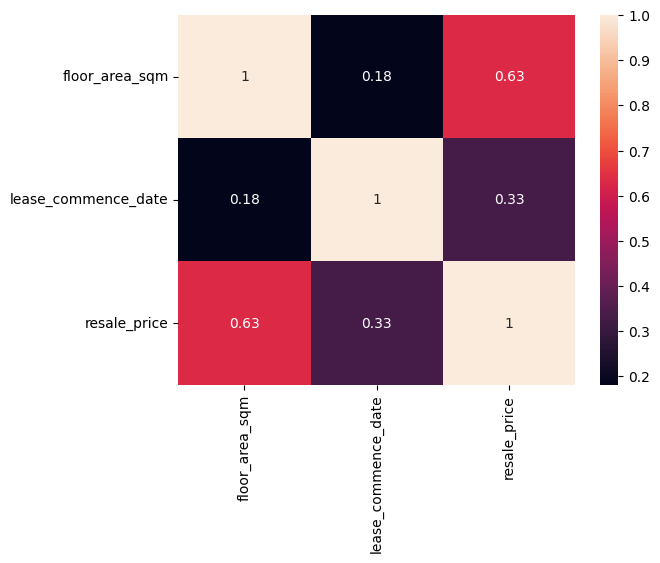

In [19]:
# Show correlation heat map and matrix
corrmat = df.corr()
sns.heatmap(corrmat,annot = True)
plt.show()

# **Data Preparation**

**Descide columns to drop / modify / categorise**

Columns to drop

#### Analyze Street name and lease commence date

For this exercise, we will be dropping the street name. However in your own analysis, you may want to consider using the street name as one of the x variables as well. Especially the distance from the address to the nearest MRT, or Primary school.

Drop also the lease commence date for this anaylsis. It doesn't cause any harm if you keep it. Just that it is another column to engineer and we want to keep things a bit simpler for this lab.

Drop columns "street_name", 'block' and "lease_commence_data".

In [51]:
df.drop(['street_name','lease_commence_date', 'block'], axis=1, inplace=True)
df.head(5)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,265000.0


Typically we may want to check the numerical data for outliers but we are ignoring those for now.

#### Analyze month.

This is the resale registration date in YYYY-MM format.

Example: 2017-01

For simplicity, ignore the month part and copy only the year part to a new column 'reg_year'. After that remove the month column.

In [53]:
df['reg_year'] = df['month'].str[:4]
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,reg_year
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,61 years 04 months,232000.0,2017
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,60 years 07 months,250000.0,2017
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,262000.0,2017
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,62 years 01 month,265000.0,2017
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,265000.0,2017


Drop month column.

In [54]:
df.drop('month', axis=1, inplace=True)
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,reg_year
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,61 years 04 months,232000.0,2017
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,60 years 07 months,250000.0,2017
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,262000.0,2017
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,62 years 01 month,265000.0,2017
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,265000.0,2017


Split 'remaining_lease' to 'remain_lease_year' and 'remain_lease_month'

In [55]:
df[['remain_lease_year', 'remain_lease_month']] = df['remaining_lease'].str.extract('(\d+)\s*year[s]?\s*([0-9]*\s*month[s]?)')
df['remain_lease_month'] = df['remain_lease_month'].replace('', 0)

remove columns: 'remaining_lease' and 'remain_lease_month'

In [56]:
df.drop(['remaining_lease', 'remain_lease_month'], axis=1, inplace=True)

We now need to fix a lot of columns that are non numeric. From the dataframe above, they are:
*   town
*   flat_type
*   block
*   storey_range
*   flat_model

View categories in 'flat_type'

In [57]:
print(df['flat_type'].unique())

['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


View categories in 'town' and count the number of unique categories in town.

In [58]:
unique_towns = df['town'].unique()
unique_town_count = df['town'].nunique()
print(unique_towns)
print("Number of unique towns:", unique_town_count)

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
Number of unique towns: 26


As this is a lab on linear regression, non ordinal categorical variables do not work very well. Although town and flat_model has has an ordinal arrangement, you need to find out the order from other data sources. I will leave you to carry out this step. For now, we will remove the flat_model, town and flat_type.

*   flat_type
*   flat_model
*   town


In [59]:
df.drop(['flat_type', 'flat_model', 'town'], axis=1, inplace=True)
df.head()

,storey_range,floor_area_sqm,resale_price,reg_year,remain_lease_year
0,10 TO 12,44.0,232000.0,2017,61
1,01 TO 03,67.0,250000.0,2017,60
2,01 TO 03,67.0,262000.0,2017,62
3,04 TO 06,68.0,265000.0,2017,62
4,01 TO 03,67.0,265000.0,2017,62


** Ordinal data have to be ranked and not categorized**

The last is storey_range. We will carry out some label encoding and check that the encoding done is correct.

In [60]:
storey_range_unique = df['storey_range'].unique()
storey_range_unique

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

Check the ordering of the encoded values are correct.

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mapped = le.fit_transform(storey_range_unique)

mapping = dict(zip(mapped, storey_range_unique))
sorted_dict = dict(sorted(mapping.items()))
print(sorted_dict)

{0: '01 TO 03', 1: '04 TO 06', 2: '07 TO 09', 3: '10 TO 12', 4: '13 TO 15', 5: '16 TO 18', 6: '19 TO 21', 7: '22 TO 24', 8: '25 TO 27', 9: '28 TO 30', 10: '31 TO 33', 11: '34 TO 36', 12: '37 TO 39', 13: '40 TO 42', 14: '43 TO 45', 15: '46 TO 48', 16: '49 TO 51'}


In [62]:
df['storey_range_cat'] = le.transform(df['storey_range'])
df.head(5)

,storey_range,floor_area_sqm,resale_price,reg_year,remain_lease_year,storey_range_cat
0,10 TO 12,44.0,232000.0,2017,61,3
1,01 TO 03,67.0,250000.0,2017,60,0
2,01 TO 03,67.0,262000.0,2017,62,0
3,04 TO 06,68.0,265000.0,2017,62,1
4,01 TO 03,67.0,265000.0,2017,62,0


Drop storey range column.

In [63]:
df.drop(['storey_range'], axis=1, inplace=True)
df.head()

,floor_area_sqm,resale_price,reg_year,remain_lease_year,storey_range_cat
0,44.0,232000.0,2017,61,3
1,67.0,250000.0,2017,60,0
2,67.0,262000.0,2017,62,0
3,68.0,265000.0,2017,62,1
4,67.0,265000.0,2017,62,0


Show the correlation mapping of the dataframe.

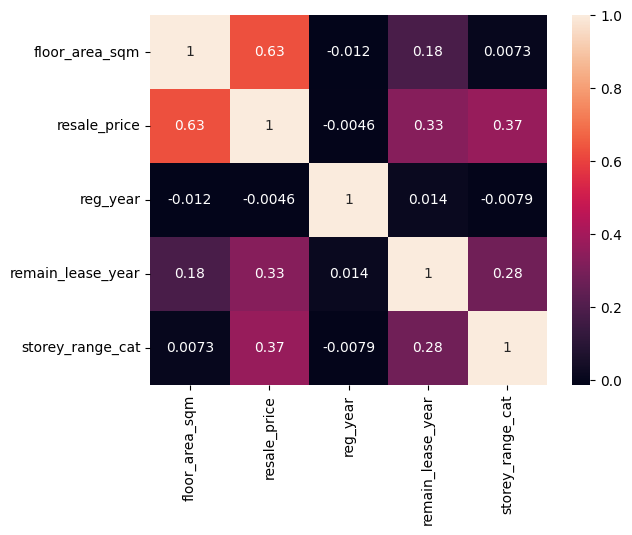

In [73]:
df['reg_year'] = pd.to_numeric(df['reg_year'], errors='coerce')
df['remain_lease_year'] = pd.to_numeric(df['remain_lease_year'], errors='coerce')
corrmat = df.corr()
sns.heatmap(corrmat,annot = True)
plt.show()

If two columns are highly correlated, drop one (probably the category column)

**Model the data**

Identify x and y variables.

In [111]:
# X: Input columns
# y: Target column

df.dropna(inplace=True)

feature_cols = ['floor_area_sqm','storey_range_cat', 'reg_year', 'remain_lease_year']

X = df[feature_cols]
y = df[['resale_price']].copy()

# print columns in X
X.columns

Index(['floor_area_sqm', 'storey_range_cat', 'reg_year', 'remain_lease_year'], dtype='object')

In [112]:
# Print y column name
y.columns

Index(['resale_price'], dtype='object')

Split dataset for train and test

Import random and set a random seed of 15

In [113]:
import random
random.seed(15)

Import library for splitting the dataset

In [114]:
from sklearn.model_selection import train_test_split

Split the data into training data (70%) and testing data (30%).

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

Modelling / Learning

Import the linear model from sklearn.

In [116]:
from sklearn import linear_model

Train the model.

In [117]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Test it on X_test and print out the first 20 values from the predicted y variables.

In [118]:
y_pred = model.predict(X_test)
print(y_pred[:20])

[[305188.61583054]
 [561984.08116673]
 [464840.56660501]
 [349473.60304019]
 [562901.70068573]
 [700432.09902225]
 [414041.90350799]
 [440007.88089135]
 [526730.75033224]
 [467238.59201533]
 [481017.73593492]
 [393206.54456762]
 [454059.15369837]
 [432299.668832  ]
 [346805.16738388]
 [313626.01340422]
 [656140.6054056 ]
 [423333.31670677]
 [244619.5170275 ]
 [514959.90724968]]


Evaluate: Performance Metrics

Print out the coefficients and the y intercept.

In [119]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 3829.14000752 26638.15267852   218.11881006  1526.19092025]]
Intercept: [-545698.25684722]


# Multilinear Regression Equation

Import the metrics library from sklearn.

In [120]:
from sklearn import metrics
import numpy as np

Calculate the RMSE. You should get 102774

In [121]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

102737.94703185622

<Axes: xlabel='resale_price'>

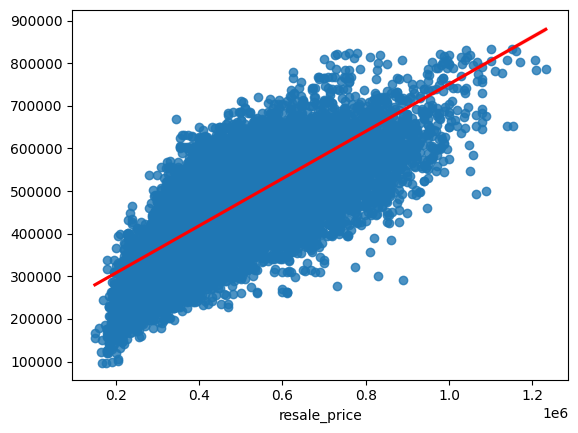

In [122]:
sns.regplot(x= y_test, y=y_pred, line_kws={"color": "red"})